## Let's first import the packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


## Import and display dataset's head

In [4]:
df = pd.read_csv('Exam_Score_Prediction.csv')
print(df.head())

   student_id  age  gender   course  study_hours  class_attendance  \
0      200.99   17    male  diploma         2.78              92.9   
1      200.99   23   other      bca         3.37              64.8   
2      200.99   22    male     b.sc         7.88              76.8   
3      200.99   20   other  diploma         0.67              48.4   
4      200.99   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes          5.8       average  online videos             low   
4             yes          9.8          poor       coaching             low   

  exam_difficulty  exam_score  
0            hard        58.9  
1        moderate        54.8  
2       

## Display Dataset information

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  float64
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 2.0+ MB
None


## Check if there is any missing values

In [8]:
print("\nMissing Values:\n", df.isna().sum())
df.describe(include='all')


Missing Values:
 student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
count,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000,20000.00000,20000,20000,20000,20000,20000.000000
unique,NaN,NaN,3,7,NaN,NaN,2,NaN,3,5,3,3,NaN
top,NaN,NaN,other,bca,NaN,NaN,yes,NaN,average,self-study,medium,moderate,NaN
freq,NaN,NaN,6726,2902,NaN,NaN,16988,NaN,6694,4079,6760,9878,NaN
mean,10000.500000,20.473300,NaN,NaN,4.007604,70.017365,NaN,7.00856,NaN,NaN,NaN,NaN,62.513225
std,5770.211372,2.284458,NaN,NaN,2.308313,17.282262,NaN,1.73209,NaN,NaN,NaN,NaN,18.908491
min,200.990000,17.000000,NaN,NaN,0.080000,40.600000,NaN,4.10000,NaN,NaN,NaN,NaN,19.599000
25%,5000.750000,18.000000,NaN,NaN,2.000000,55.100000,NaN,5.50000,NaN,NaN,NaN,NaN,48.800000
50%,10000.500000,20.000000,NaN,NaN,4.040000,69.900000,NaN,7.00000,NaN,NaN,NaN,NaN,62.600000
75%,15000.250000,22.000000,NaN,NaN,6.000000,85.000000,NaN,8.50000,NaN,NaN,NaN,NaN,76.300000


### There is no any missing values, so we move further

## Divide into categorial columns

In [14]:
numeric_cols = ["age", "study_hours", "class_attendance", "sleep_hours", "exam_score"]
categorical_cols = [
    "gender", "course", "internet_access",
    "sleep_quality", "study_method",
    "facility_rating", "exam_difficulty"
]


## If there is any missing values then fill with mean value

In [16]:
# Create imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

df.head()


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,200.99,17.0,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,200.99,23.0,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,200.99,22.0,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,200.99,20.0,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,200.99,20.0,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


## Encode categorical features (One-Hot Encoding)

In [15]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()


,student_id,age,study_hours,class_attendance,sleep_hours,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,200.99,17,2.78,92.9,7.4,58.9,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
1,200.99,23,3.37,64.8,4.6,54.8,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
2,200.99,22,7.88,76.8,8.5,90.3,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
3,200.99,20,0.67,48.4,5.8,29.7,False,True,False,False,...,False,False,False,False,True,False,True,False,False,True
4,200.99,20,0.89,71.6,9.8,43.7,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


## Feature Scaling (StandardScaler)

In [17]:
scaler = StandardScaler()
df_scaled = df_encoded.copy()

df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

df_scaled.head()


,student_id,age,study_hours,class_attendance,sleep_hours,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,200.99,-1.520442,-0.531832,1.324086,0.225999,-0.191095,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
1,200.99,1.106067,-0.276227,-0.301899,-1.390586,-0.407934,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
2,200.99,0.668315,1.677629,0.392472,0.861085,1.469576,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
3,200.99,-0.207188,-1.445942,-1.250872,-0.697764,-1.735413,False,True,False,False,...,False,False,False,False,True,False,True,False,False,True
4,200.99,-0.207188,-1.350632,0.091578,1.611643,-0.994987,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


## Histogram of a feature

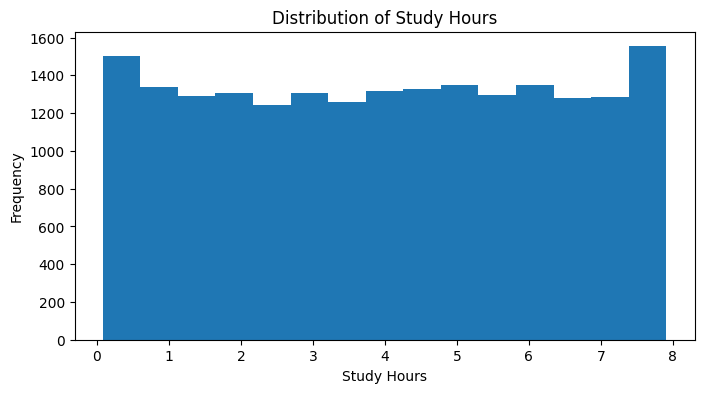

In [18]:
plt.figure(figsize=(8,4))
plt.hist(df['study_hours'], bins=15)
plt.title("Distribution of Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.show()


## Scatter plot to see relationships

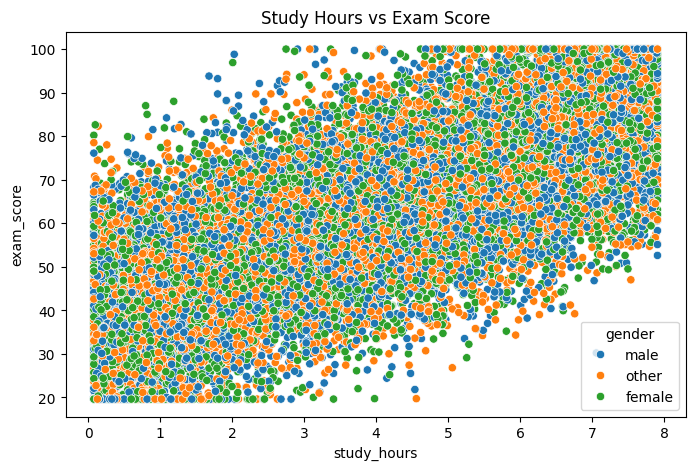

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="study_hours", y="exam_score", hue="gender", data=df)
plt.title("Study Hours vs Exam Score")
plt.show()


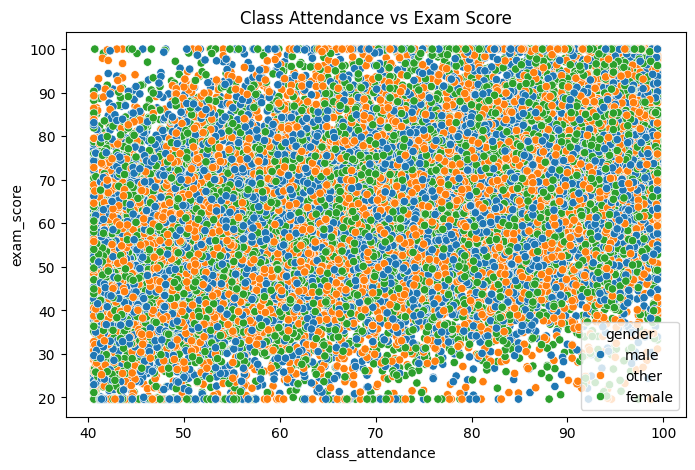

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="class_attendance", y="exam_score", hue="gender", data=df)
plt.title("Class Attendance vs Exam Score")
plt.show()


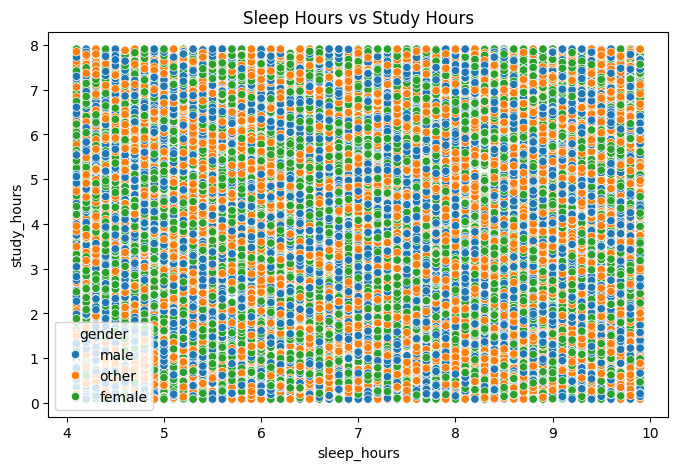

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="sleep_hours", y="study_hours", hue="gender", data=df)
plt.title("Sleep Hours vs Study Hours")
plt.show()


## Correlation Heatmap

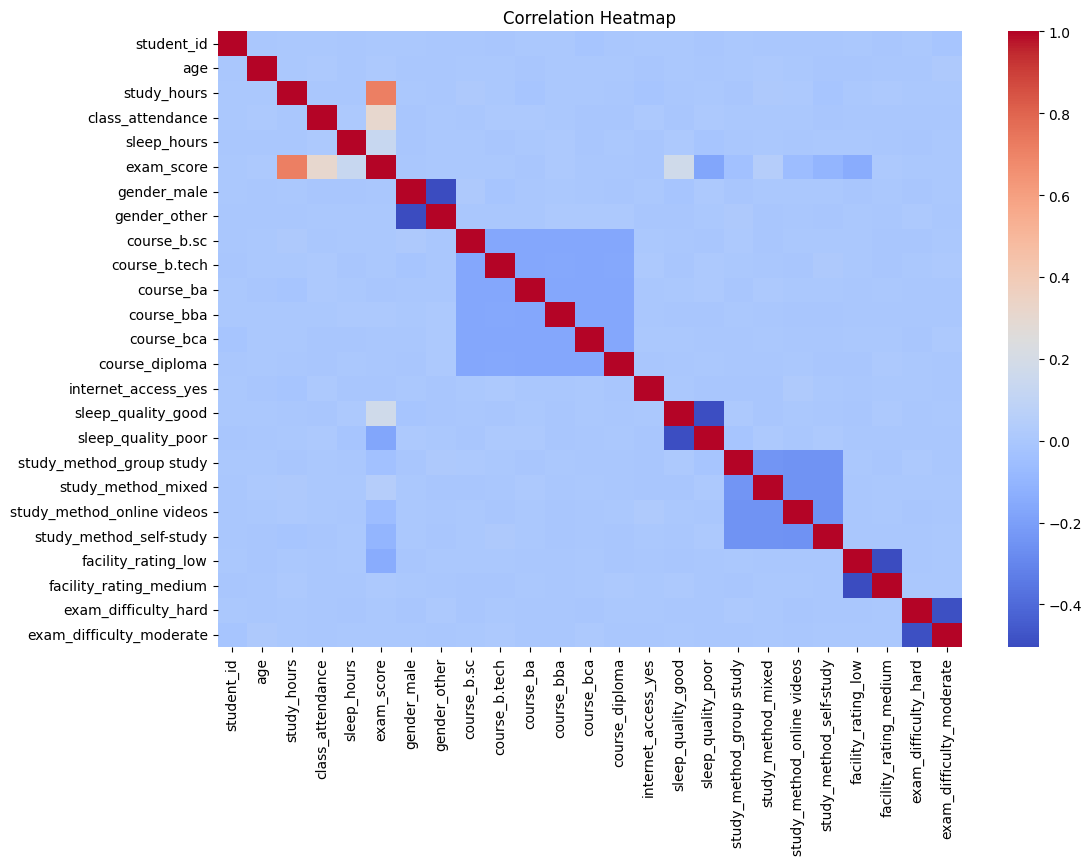

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


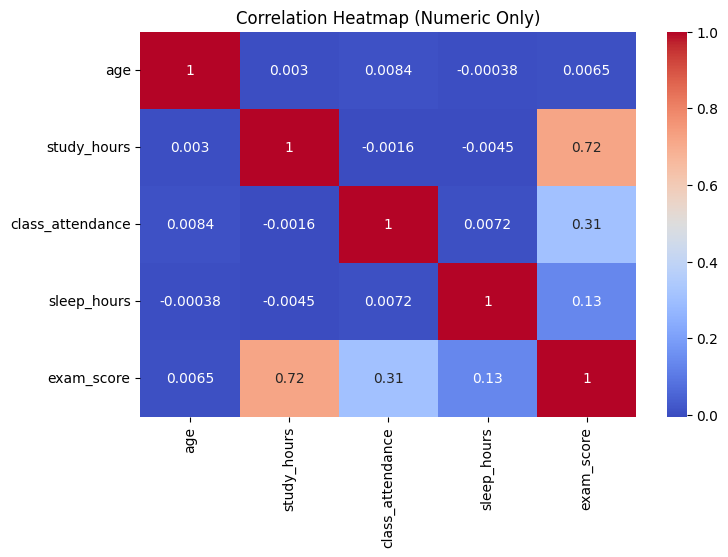

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Only)")
plt.show()
